In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

df = pd.read_csv(dataset_path)
df.DATE = pd.to_datetime(df.DATE, format="%m-%d-%Y")
df.set_index('DATE', inplace=True)

In [0]:
from statsmodels.tsa.stattools import adfuller

X = df.Value.values

In [6]:
result = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -2.2570
Valor-p: 0.1862
Valores Críticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708


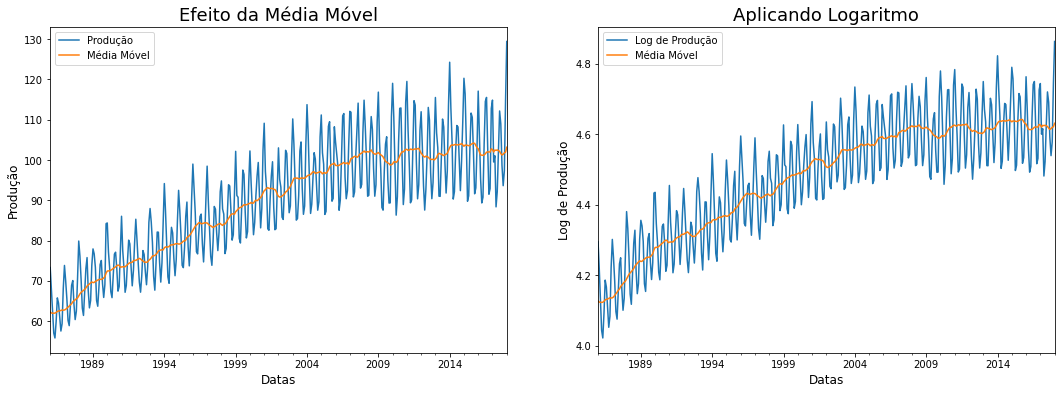

In [19]:
med_movel = df.rolling(12).mean()

df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))

#Inserindo os valores no primeiro gráfico:
df[12:].plot(ax=ax1)
med_movel[12:].plot(ax=ax1)

#Formatando o primeiro gráfico:
ax1.set_title("Efeito da Média Móvel", fontsize = 18)
ax1.legend(['Produção', 'Média Móvel'])
ax1.set_xlabel('Datas', fontsize = 12)
ax1.set_ylabel('Produção', fontsize = 12)

#Inserido os valores nos segundo gráfico:
df_log[12:].plot(ax=ax2)
ma_log[12:].plot(ax=ax2)

#Formatando o segundo gráfico:
ax2.set_title("Aplicando Logaritmo", fontsize = 18)
ax2.legend(['Log de Produção', 'Média Móvel'])
ax2.set_xlabel('Datas', fontsize = 12)
ax2.set_ylabel('Log de Produção', fontsize = 12);

In [0]:
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(12).mean()
std_sub = df_sub.rolling(12).std()

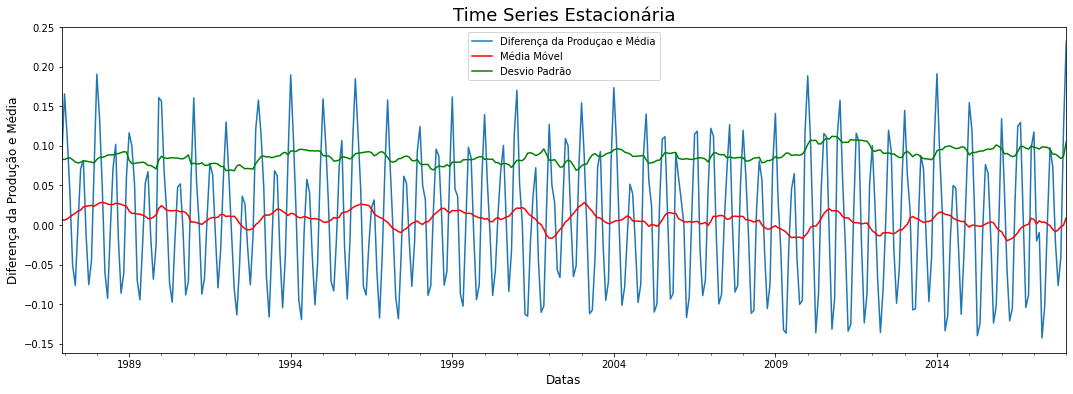

In [24]:
fig, ax = plt.subplots(figsize = (18,6))

#Inserindo os valores no primeiro gráfico:
df_sub[12:].plot(ax=ax)
ma_sub[12:].plot(ax=ax, color = 'r')
std_sub[12:].plot(ax=ax, color = 'g')

#Formatando o primeiro gráfico:
ax.set_title("Time Series Estacionária", fontsize = 18)
ax.legend(['Diferença da Produçao e Média', 'Média Móvel', 'Desvio Padrão'])
ax.set_xlabel('Datas', fontsize = 12)
ax.set_ylabel('Diferença da Produção e Média', fontsize = 12);
